In [1]:
%load_ext autoreload
%autoreload 2
import os 
os.environ["HF_HOME"] = "/tmp/wendler/hf_cache"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import sys
sys.path.append('/share/u/wendler/code/my-sdxl-unbox')

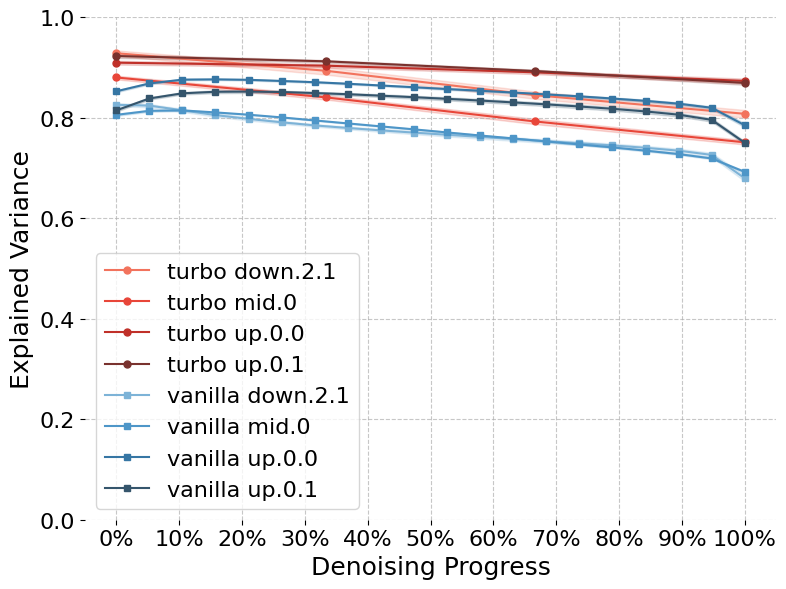

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


files = {"turbo":"results/final/timestep_generalization_n100_t4_turbo_k160_exp4.csv",
        "vanilla":"results/final/timestep_generalization_n100_t20_vanilla_k160_exp4.csv"}

# Load the data from each file
dfs = {}
for model_name, file_path in files.items():
    dfs[model_name] = pd.read_csv(file_path)

# Create a new figure
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Remove border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Define a different color palette for each model
vanilla_colors = sns.color_palette("Blues_d", n_colors=len(dfs["vanilla"]["block"].unique()))
turbo_colors = sns.color_palette("Reds_d", n_colors=len(dfs["turbo"]["block"].unique()))

# Plot each model with its specific cfg_idx
for model_name, df in dfs.items():
    # Use cfg_idx 0 for turbo and cfg_idx 1 for vanilla
    cfg_idx = 0 if model_name == "turbo" else 1
    
    # Group by block and tidx to get mean and std of explained variance for this cfg_idx
    var_col = f"explained_var_{cfg_idx}"
    summary_df = df.groupby(["block", "tidx"])[var_col].agg(['mean', 'std']).reset_index()
    
    # Convert tidx to normalized timestep t (where 999 -> 0 and 0 -> 1)
    if model_name == "vanilla":
        n_timesteps = 20  # From the file name
    else:  # turbo
        n_timesteps = 4  # From the file name
    
    # Calculate the actual timesteps (assuming linear spacing from 999 to 0)
    max_t = 999
    summary_df['actual_t'] = max_t - (summary_df['tidx'] * (max_t / (n_timesteps - 1)))
    # Normalize timesteps (999 -> 0, 0 -> 1)
    summary_df['normalized_t'] = 1 - (summary_df['actual_t'] / max_t)
    # Convert to percentage of denoising (0% -> 100%)
    summary_df['denoising_percent'] = summary_df['normalized_t'] * 100
    
    blocks = summary_df['block'].unique()
    colors = turbo_colors if model_name == "turbo" else vanilla_colors
    
    for i, block in enumerate(blocks):
        block_df = summary_df[summary_df['block'] == block]
        linestyle = '-' if model_name == "turbo" else '-'
        marker = 'o' if model_name == "turbo" else 's'
        ax.plot(block_df['denoising_percent'], block_df['mean'], 
                label=f"{model_name} {block}", 
                color=colors[i], 
                linestyle=linestyle,
                marker=marker,
                markersize=5)
        
        # Gaussian confidence interval: mean ± 1.96*std
        lower = block_df['mean'] - 1.96 * block_df['std']/np.sqrt(len(block_df))
        upper = block_df['mean'] + 1.96 * block_df['std']/np.sqrt(len(block_df))
        ax.fill_between(block_df['denoising_percent'], lower, upper, color=colors[i], alpha=0.2)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set x-ticks at 10% intervals
ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticklabels([f"{x}%" for x in range(0, 101, 10)])

# Increase font size
ax.set_xlabel("Denoising Progress", fontsize=18)
ax.set_ylabel("Explained Variance", fontsize=18)
ax.legend(loc='lower left', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, 1)
plt.tight_layout()

# Save the combined plot
plt.savefig(f"results/final/combined_explained_variance_turbo_vanilla_timestep.pdf")
plt.savefig(f"results/final/combined_explained_variance_turbo_vanilla_timestep.png")
plt.show()

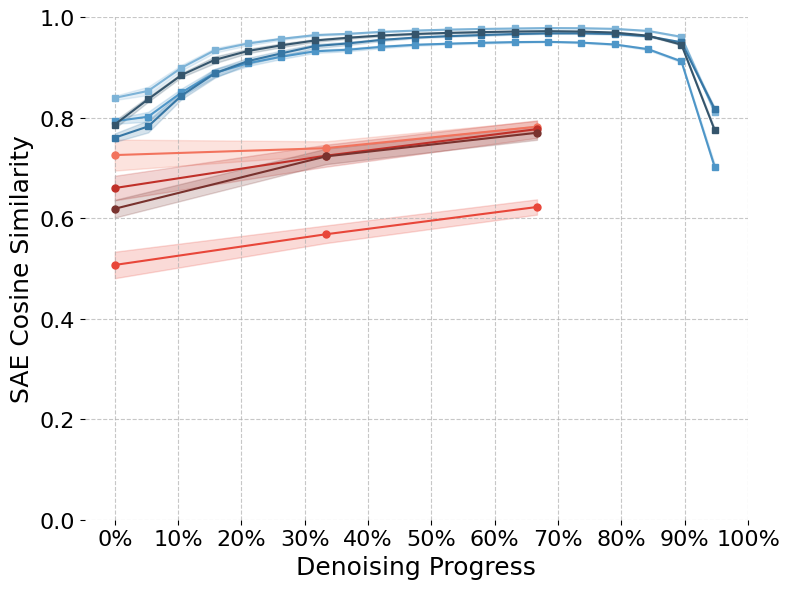

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


files = {"turbo":"results/final/timestep_generalization_n100_t4_turbo_k160_exp4.csv",
        "vanilla":"results/final/timestep_generalization_n100_t20_vanilla_k160_exp4.csv"}

# Load the data from each file
dfs = {}
for model_name, file_path in files.items():
    dfs[model_name] = pd.read_csv(file_path)

# Create a new figure
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Remove border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Define a different color palette for each model
vanilla_colors = sns.color_palette("Blues_d", n_colors=len(dfs["vanilla"]["block"].unique()))
turbo_colors = sns.color_palette("Reds_d", n_colors=len(dfs["turbo"]["block"].unique()))

# Plot each model with its specific cfg_idx
for model_name, df in dfs.items():
    # Use cfg_idx 0 for turbo and cfg_idx 1 for vanilla
    cfg_idx = 0 if model_name == "turbo" else 1
    
    # Group by block and tidx to get mean and std of IoU for this cfg_idx
    iou_col = f"iou_{cfg_idx}"
    iou_col = f"fdots_{cfg_idx}"
    summary_df = df.groupby(["block", "tidx"])[iou_col].agg(['mean', 'std']).reset_index()
    
    # Convert tidx to normalized timestep t (where 999 -> 0 and 0 -> 1)
    if model_name == "vanilla":
        n_timesteps = 20  # From the file name
    else:  # turbo
        n_timesteps = 4  # From the file name
    
    # Calculate the actual timesteps (assuming linear spacing from 999 to 0)
    max_t = 999
    summary_df['actual_t'] = max_t - (summary_df['tidx'] * (max_t / (n_timesteps - 1)))
    # Normalize timesteps (999 -> 0, 0 -> 1)
    summary_df['normalized_t'] = 1 - (summary_df['actual_t'] / max_t)
    # Convert to percentage of denoising (0% -> 100%)
    summary_df['denoising_percent'] = summary_df['normalized_t'] * 100
    
    blocks = summary_df['block'].unique()
    colors = turbo_colors if model_name == "turbo" else vanilla_colors
    
    for i, block in enumerate(blocks):
        block_df = summary_df[summary_df['block'] == block]
        linestyle = '-' if model_name == "turbo" else '-'
        marker = 'o' if model_name == "turbo" else 's'
        ax.plot(block_df['denoising_percent'][:-1], block_df['mean'][:-1], 
                label=f"{model_name} {block}", 
                color=colors[i], 
                linestyle=linestyle,
                marker=marker,
                markersize=5)
        
        # Gaussian confidence interval: mean ± 1.96*std
        lower = block_df['mean'] - 1.96 * block_df['std']/np.sqrt(len(block_df))
        upper = block_df['mean'] + 1.96 * block_df['std']/np.sqrt(len(block_df))
        ax.fill_between(block_df['denoising_percent'][:-1], lower[:-1], upper[:-1], color=colors[i], alpha=0.2)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set x-ticks at 10% intervals
ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticklabels([f"{x}%" for x in range(0, 101, 10)])

# Increase font size
ax.set_xlabel("Denoising Progress", fontsize=18)
ax.set_ylabel("SAE Cosine Similarity", fontsize=18)
#ax.legend(loc='lower left', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, 1)
plt.tight_layout()

# Save the combined plot
plt.savefig(f"results/final/combined_sim_turbo_vanilla_timestep.pdf")
plt.savefig(f"results/final/combined_sim_turbo_vanilla_timestep.png")
plt.show()

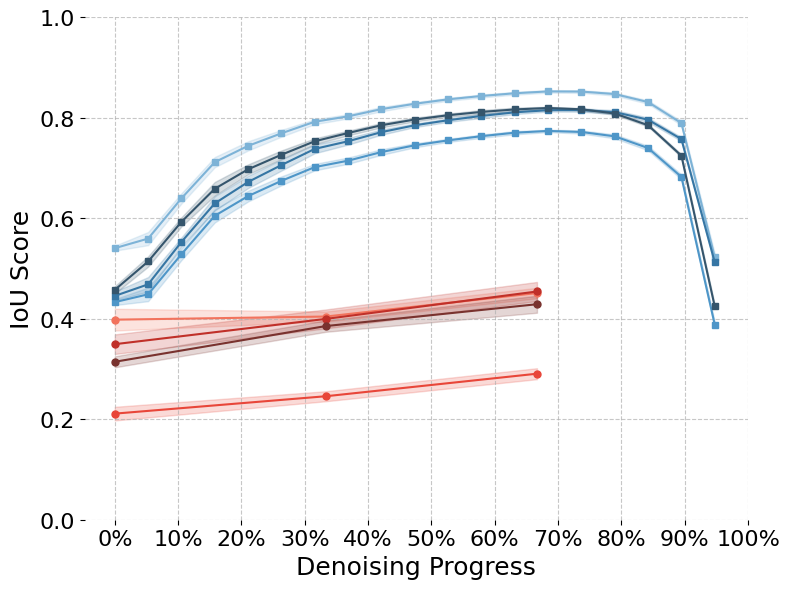

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


files = {"turbo":"results/final/timestep_generalization_n100_t4_turbo_k160_exp4.csv",
        "vanilla":"results/final/timestep_generalization_n100_t20_vanilla_k160_exp4.csv"}

# Load the data from each file
dfs = {}
for model_name, file_path in files.items():
    dfs[model_name] = pd.read_csv(file_path)

# Create a new figure
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Remove border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Define a different color palette for each model
vanilla_colors = sns.color_palette("Blues_d", n_colors=len(dfs["vanilla"]["block"].unique()))
turbo_colors = sns.color_palette("Reds_d", n_colors=len(dfs["turbo"]["block"].unique()))

# Plot each model with its specific cfg_idx
for model_name, df in dfs.items():
    # Use cfg_idx 0 for turbo and cfg_idx 1 for vanilla
    cfg_idx = 0 if model_name == "turbo" else 1
    
    # Group by block and tidx to get mean and std of IoU for this cfg_idx
    iou_col = f"iou_{cfg_idx}"
    #iou_col = f"fdots_{cfg_idx}"
    summary_df = df.groupby(["block", "tidx"])[iou_col].agg(['mean', 'std']).reset_index()
    
    # Convert tidx to normalized timestep t (where 999 -> 0 and 0 -> 1)
    if model_name == "vanilla":
        n_timesteps = 20  # From the file name
    else:  # turbo
        n_timesteps = 4  # From the file name
    
    # Calculate the actual timesteps (assuming linear spacing from 999 to 0)
    max_t = 999
    summary_df['actual_t'] = max_t - (summary_df['tidx'] * (max_t / (n_timesteps - 1)))
    # Normalize timesteps (999 -> 0, 0 -> 1)
    summary_df['normalized_t'] = 1 - (summary_df['actual_t'] / max_t)
    # Convert to percentage of denoising (0% -> 100%)
    summary_df['denoising_percent'] = summary_df['normalized_t'] * 100
    
    blocks = summary_df['block'].unique()
    colors = turbo_colors if model_name == "turbo" else vanilla_colors
    
    for i, block in enumerate(blocks):
        block_df = summary_df[summary_df['block'] == block]
        linestyle = '-' if model_name == "turbo" else '-'
        marker = 'o' if model_name == "turbo" else 's'
        ax.plot(block_df['denoising_percent'][:-1], block_df['mean'][:-1], 
                label=f"{model_name} {block}", 
                color=colors[i], 
                linestyle=linestyle,
                marker=marker,
                markersize=5)
        
        # Gaussian confidence interval: mean ± 1.96*std
        lower = block_df['mean'] - 1.96 * block_df['std']/np.sqrt(len(block_df))
        upper = block_df['mean'] + 1.96 * block_df['std']/np.sqrt(len(block_df))
        ax.fill_between(block_df['denoising_percent'][:-1], lower[:-1], upper[:-1], color=colors[i], alpha=0.2)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Set x-ticks at 10% intervals
ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticklabels([f"{x}%" for x in range(0, 101, 10)])

# Increase font size
ax.set_xlabel("Denoising Progress", fontsize=18)
ax.set_ylabel("IoU Score", fontsize=18)
#ax.legend(loc='lower left', fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0, 1)
plt.tight_layout()

# Save the combined plot
plt.savefig(f"results/final/combined_iou_turbo_vanilla_timestep.pdf")
plt.savefig(f"results/final/combined_iou_turbo_vanilla_timestep.png")
plt.show()